In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import numpy as np
import requests
from talib import MACD, RSI
from datetime import datetime, timedelta, date

%matplotlib inline

In [2]:
start_day_to_analyze = '2020-01-31'
end_day_to_analyze = '2020-02-01'

In [3]:
base_url = "https://api.alpaca.markets"
api_key_id = "AKVKN4TLUUS5MZO5KYLM"
api_secret = "nkK2UmvE1kTFFw1ZlaqDmwCyiuCu7OOeB5y2La/X"

In [4]:
db_conn = create_engine("postgresql://momentum@localhost:5432/tradedb")

In [5]:
api = tradeapi.REST(
    base_url=base_url, key_id=api_key_id, secret_key=api_secret
)
session = requests.session()

In [6]:
query = f'''
SELECT * 
FROM 
trades 
WHERE 
    buy_time >= '{start_day_to_analyze}' and 
    buy_time < '{end_day_to_analyze}' 
ORDER BY symbol, buy_time
'''

In [7]:
trades =  pd.read_sql_query(query, db_conn)

In [22]:
trades

,trade_id,algo_run_id,is_win,symbol,qty,buy_price,buy_indicators,buy_time,sell_price,sell_indicators,sell_time,client_sell_time,client_buy_time
0,350,46,False,AEMD,343,4.07,"{'rsi': 59.4451064903339, 'macd1': [0.04479889...",2020-01-31 14:48:23.546449,4.00,"{'rsi': 46.10451137699306, 'macd': [0.04898136...",2020-01-31 14:54:01.869885,2020-01-31T14:56:24.698876207Z,2020-01-31T14:48:23.305454741Z
1,405,46,False,AEMD,850,4.08,"{'rsi': 57.50506733921924, 'macd1': [0.0115393...",2020-01-31 15:20:23.511106,4.07,"{'rsi': 49.05284979244232, 'macd': [0.01612486...",2020-01-31 15:22:25.307496,2020-01-31T15:27:01.682943682Z,2020-01-31T15:20:23.208935284Z
2,417,46,False,AEMD,935,4.15,"{'rsi': 59.368918098854685, 'macd1': [0.023027...",2020-01-31 15:33:04.185180,4.13,"{'rsi': 57.349696100787895, 'macd': [0.0124918...",2020-01-31 15:29:41.426877,2020-01-31T15:33:49.543961589Z,2020-01-31T15:33:04.0679501Z
3,419,46,False,AEMD,850,4.16,"{'rsi': 60.871875107353446, 'macd1': [0.022797...",2020-01-31 15:35:25.833514,4.13,"{'rsi': 56.02356678501452, 'macd': [0.01293913...",2020-01-31 15:35:41.890294,2020-01-31T15:35:41.261971914Z,2020-01-31T15:35:25.721336915Z
4,420,46,False,AEMD,850,4.16,"{'rsi': 60.871875107353446, 'macd1': [0.022797...",2020-01-31 15:35:45.056241,4.13,"{'rsi': 57.90090216787718, 'macd': [0.01293913...",2020-01-31 15:35:41.890294,2020-01-31T15:35:59.311624857Z,2020-01-31T15:35:44.642210038Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,439,46,False,WKHS,843,3.13,"{'rsi': 74.53304540922608, 'macd1': [0.0258052...",2020-01-31 15:55:13.878117,3.11,"{'rsi': 63.18188361834021, 'macd': [0.01615492...",2020-01-31 15:58:49.619501,2020-01-31T15:59:32.322389274Z,2020-01-31T15:55:13.799640475Z
116,448,46,True,WKHS,1558,3.16,"{'rsi': 73.60683726622959, 'macd1': [0.0219701...",2020-01-31 16:07:11.020361,3.18,"{'rsi': 78.00265544890796, 'macd': [0.01283928...",2020-01-31 16:05:01.536895,2020-01-31T16:08:08.464568314Z,2020-01-31T16:07:10.922723568Z
117,454,46,True,WKHS,779,3.22,"{'rsi': 68.69821473875007, 'macd1': [0.0241083...",2020-01-31 16:14:02.168419,3.25,"{'rsi': 64.3815930437594, 'macd': [0.020543677...",2020-01-31 16:16:25.965094,2020-01-31T16:19:03.305600988Z,2020-01-31T16:14:02.026445069Z
118,459,46,False,WKHS,406,3.33,"{'rsi': 73.35124225545917, 'macd1': [0.0460550...",2020-01-31 16:25:11.077100,3.30,"{'rsi': 66.52914836407817, 'macd': [0.03100422...",2020-01-31 16:26:00.761023,2020-01-31T16:27:04.469899689Z,2020-01-31T16:25:10.938195236Z


In [24]:
trade_details = {}

for index, row in trades.iterrows():
    symbol = row['symbol']
    buy_time = row['client_buy_time']
    buy_price = row['buy_price']
    sell_time = row['client_sell_time']
    sell_price = row['sell_price']
                    
    if symbol not in trade_details:
        trade_details[symbol] = []
    trade_details[symbol].append((buy_time, buy_price, sell_time, sell_price))

In [8]:
symbols = trades['symbol'].value_counts()

In [9]:
len(symbols)

26

In [10]:
symbols

VXX     13
TECS    12
AEMD    10
UVXY    10
VIXY     9
WKHS     8
DWT      6
BIMI     5
CODX     5
SNDX     5
CBLI     5
OILD     4
SCO      4
ALNA     3
COT      3
AHPI     3
AUPH     3
SELB     3
LLIT     2
HCHC     1
WTID     1
NNVC     1
ITMR     1
VRS      1
FLEX     1
RFP      1
Name: symbol, dtype: int64

In [11]:
minute_history = {}
for symbol, count in symbols.items():
    minute_history[symbol] = api.polygon.historic_agg_v2(
        symbol, 
        1, 
        'minute', 
        _from = start_day_to_analyze, 
        to=end_day_to_analyze, 
        limit=5000).df

VXX analysis


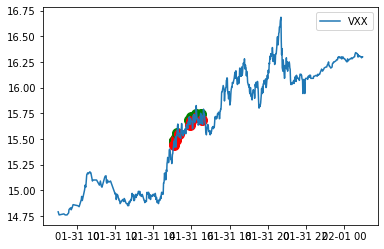

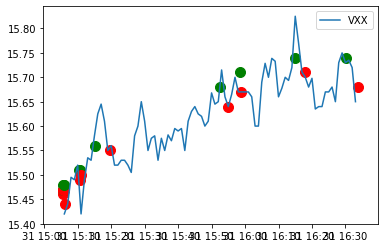

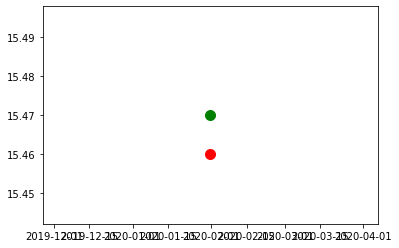

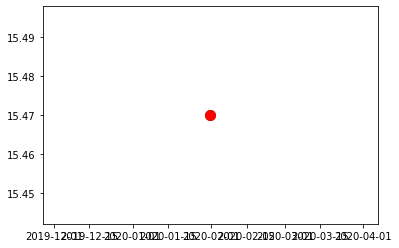

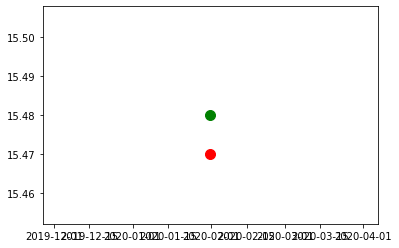

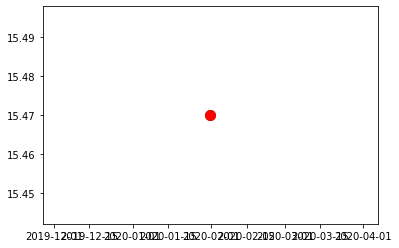

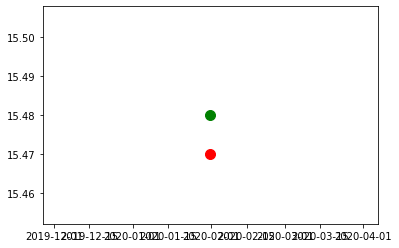

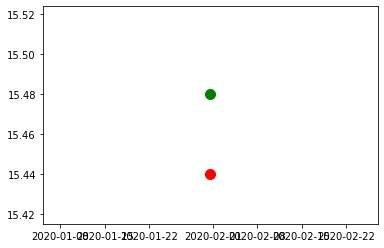

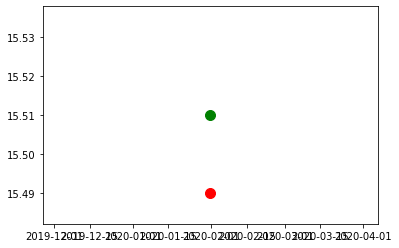

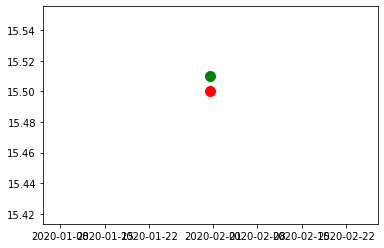

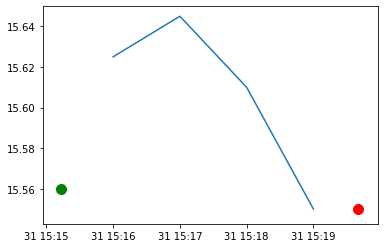

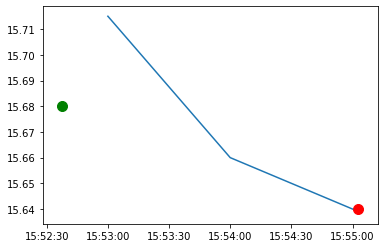

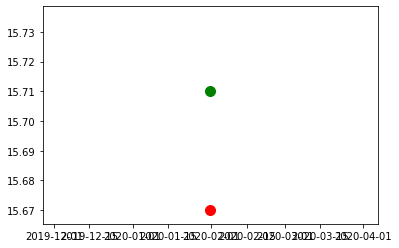

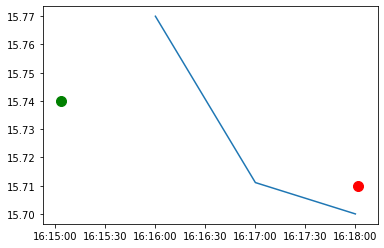

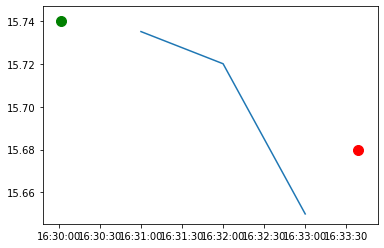

TECS analysis


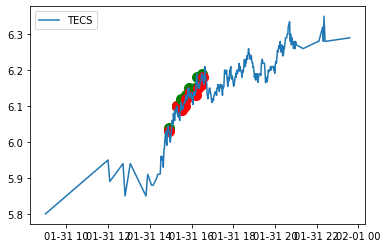

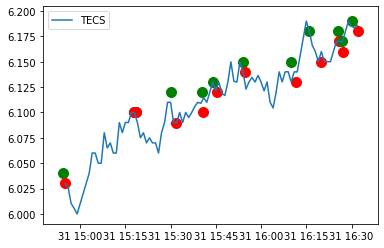

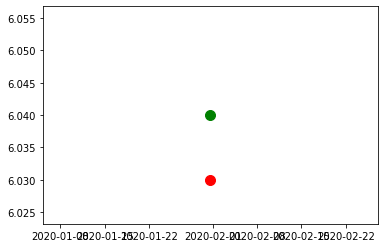

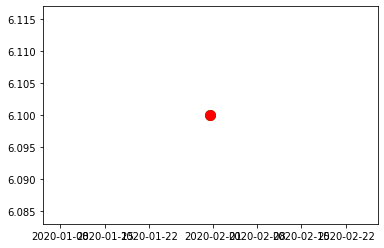

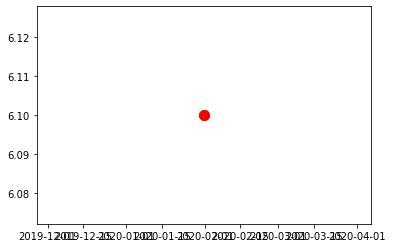

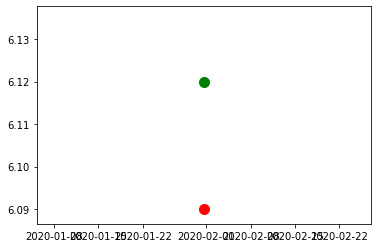

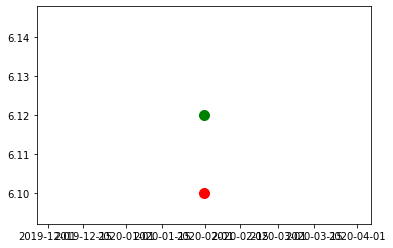

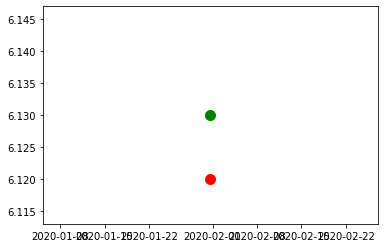

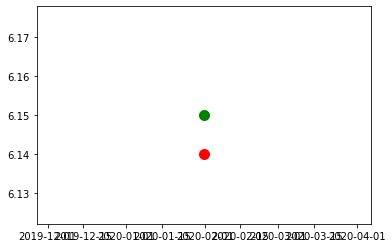

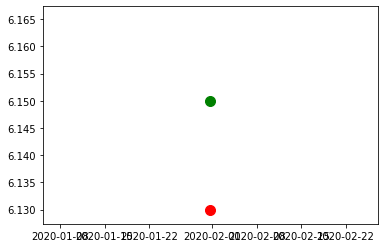

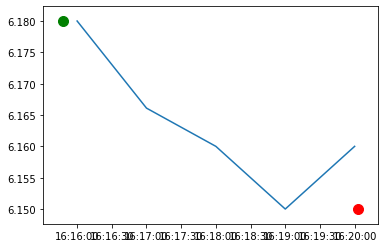

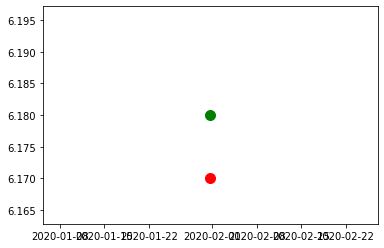

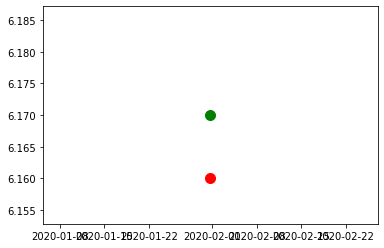

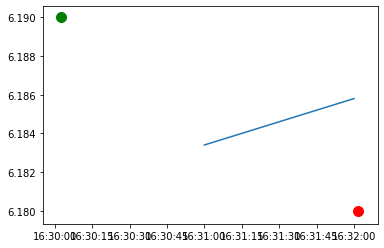

AEMD analysis


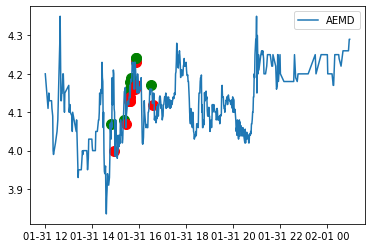

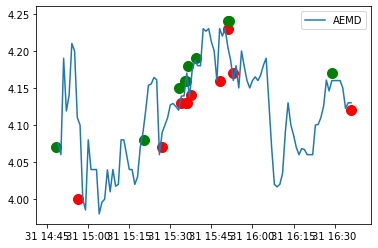

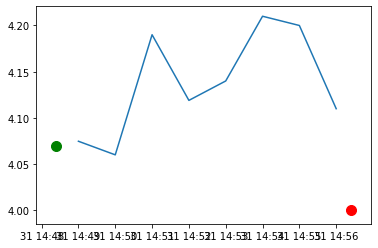

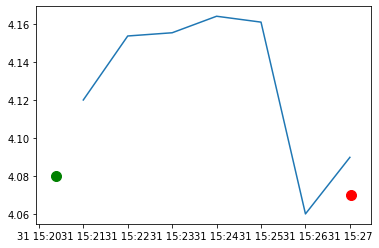

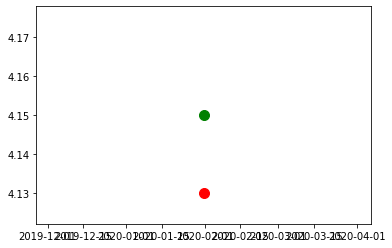

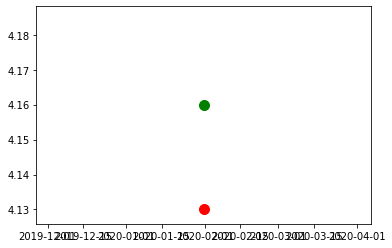

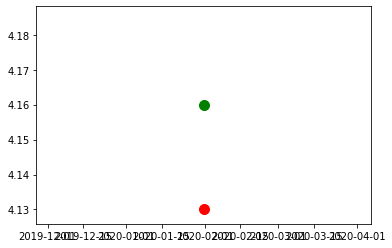

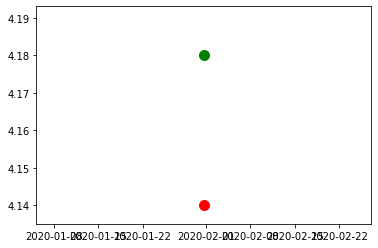

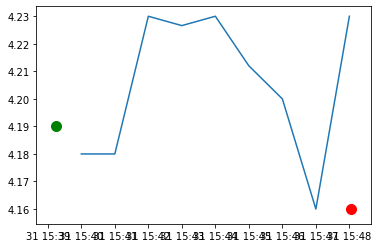

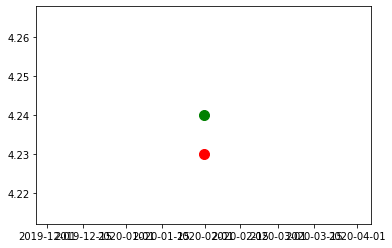

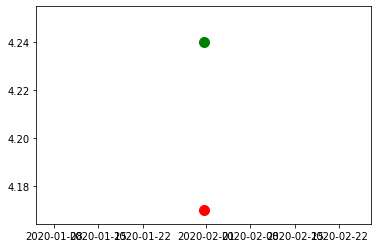

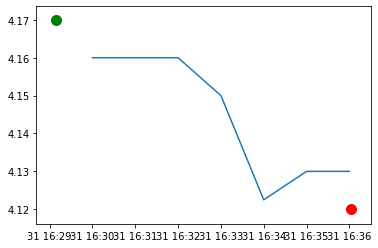

UVXY analysis


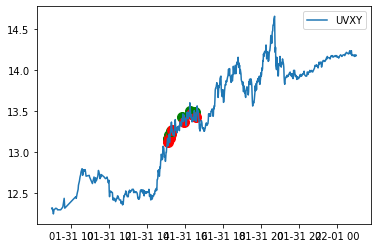

In [ ]:
for symbol in minute_history:
    print (f'{symbol} analysis')
    plt.plot(minute_history[symbol]['close'], label=symbol)

    for trade in trade_details[symbol]:
        plt.scatter(trade[0], trade[1], c='g', s=100)
        plt.scatter(trade[2], trade[3], c='r', s=100)
    plt.legend()
    plt.show()
    
    min_time = trade_details[symbol][0][0]
    max_time = trade_details[symbol][-1][2]
    
    plt.plot(minute_history[symbol]['close'][min_time:max_time], label=symbol)
    for trade in trade_details[symbol]:
        plt.scatter(trade[0], trade[1], c='g', s=100)
        plt.scatter(trade[2], trade[3], c='r', s=100)
    plt.legend()
    plt.show()
    
    for trade in trade_details[symbol]:
        plt.plot(minute_history[symbol]['close'][trade[0]:trade[2]])
        plt.scatter(trade[0], trade[1], c='g', s=100)
        plt.scatter(trade[2], trade[3], c='r', s=100)
        plt.show()
    